In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import  StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import pickle

In [2]:
df = pd.read_csv("../data/processed/gladiador_data_procesado.csv")
df.head()

,Wins,Public Favor,Survived,Allegiance Network_Strong
0,11,0.841842,False,1
1,7,0.651044,True,0
2,6,0.593816,True,1
3,6,0.540815,False,1
4,12,0.761651,False,1


In [3]:
df['Survived'] = df['Survived'].astype(int)
df.head()

,Wins,Public Favor,Survived,Allegiance Network_Strong
0,11,0.841842,0,1
1,7,0.651044,1,0
2,6,0.593816,1,1
3,6,0.540815,0,1
4,12,0.761651,0,1


## MODELO DECISSION TREE CLASSIFIER

In [4]:
X = df[["Wins", "Public Favor", "Allegiance Network_Strong"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7980, 3)
(7980,)
(1996, 3)
(1996,)


In [6]:
#Inicializo y entreno el clasificador de árbol de decisión
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
#Realizo Predicciones

# Predicciones sobre el mismo conjunto de datos de entrenamiento
pred_dtc = dtc_model.predict(X_test)

In [8]:
#Obtengo las PROBABILIDADES de predicción
pred_proba = dtc_model.predict_proba(X_test)[:, 1]

In [9]:
results_test_df = X_test.copy()
results_test_df['Actual Survived'] = y_test
results_test_df['Predicted Survived'] = pred_dtc
print("\nDataFrame con Predicciones para el conjunto de PRUEBA:")
print(results_test_df.head())


DataFrame con Predicciones para el conjunto de PRUEBA:
      Wins  Public Favor  Allegiance Network_Strong  Actual Survived  \
5825     9      0.729941                          1                0   
5171    14      0.911117                          1                1   
6041     6      0.602053                          0                0   
107     10      0.709351                          1                0   
3422    12      0.861939                          1                1   

      Predicted Survived  
5825                   1  
5171                   1  
6041                   1  
107                    0  
3422                   1  


In [10]:
full_predictions = dtc_model.predict(X)
df['Predicted Survived'] = full_predictions
print("\nDataFrame original con Predicciones para TODO el conjunto de datos:")
print(df.head())


DataFrame original con Predicciones para TODO el conjunto de datos:
   Wins  Public Favor  Survived  Allegiance Network_Strong  Predicted Survived
0    11      0.841842         0                          1                   1
1     7      0.651044         1                          0                   1
2     6      0.593816         1                          1                   1
3     6      0.540815         0                          1                   0
4    12      0.761651         0                          1                   0


In [ ]:
# Predecir para un nuevo dato, por ejemplo:
# Un personaje con 8 victorias, 0.7 de favor público y una red de lealtad fuerte (1)
new_data = pd.DataFrame([[8, 0.7, 1]], columns=["Wins", "Public Favor", "Allegiance Network_Strong"])
new_prediction = dtc_model.predict(new_data)

print(f"\nPredicción para un nuevo personaje (Wins: 8, Public Favor: 0.7, Allegiance Network_Strong: 1): {new_prediction[0]}")

if new_prediction[0] == 1:
    print("El modelo predice que este personaje Sobreviviría.")
else:
    print("El modelo predice que este personaje No Sobreviviría.")


Predicción para un nuevo personaje (Wins: 8, Public Favor: 0.7, Allegiance Network_Strong: 1): 1
El modelo predice que este personaje Sobreviviría.


In [12]:
print("--- Métricas de Clasificación ---")
print("Precisión (Accuracy): ", accuracy_score(y_test, pred_dtc))
print("Precisión (Clase 1): ", precision_score(y_test, pred_dtc))
print("Sensibilidad (Recall - Clase 1): ", recall_score(y_test, pred_dtc))
print("Puntuación F1 (Clase 1): ", f1_score(y_test, pred_dtc))
# Si pred_dtc son probabilidades, podrías calcular el ROC AUC:
print("ROC AUC: ", roc_auc_score(y_test, pred_proba))

--- Métricas de Clasificación ---
Precisión (Accuracy):  0.6417835671342685
Precisión (Clase 1):  0.6336336336336337
Sensibilidad (Recall - Clase 1):  0.6446028513238289
Puntuación F1 (Clase 1):  0.6390711761736497
ROC AUC:  0.6418280528808493


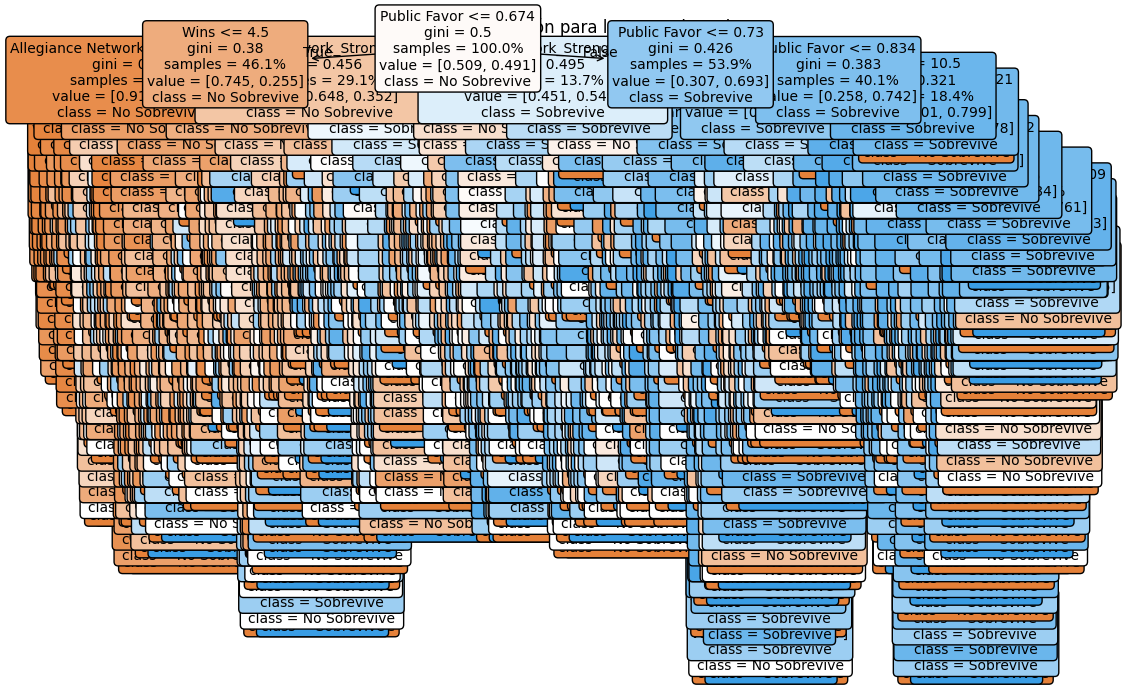

In [25]:
#Visualizo el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(dtc_model, 
          feature_names=X.columns.tolist(),  # Nombres de las características
          class_names=['No Sobrevive', 'Sobrevive'],  # Nombres de las clases (0 y 1)
          filled=True,  # Rellenar los nodos con colores
          rounded=True,  # Bordes de los nodos redondeados
          proportion=True, # Mostrar las proporciones de las muestras
          fontsize=10)
plt.title("Árbol de Decisión para la Supervivencia")
plt.show()

In [26]:
#Creo un DataFrame completo de entrenamiento combinando X_train y y_train
train_df = pd.concat([X_train, y_train], axis=1)

#Creo un DataFrame completo de prueba combinando X_test y y_test
test_df = pd.concat([X_test, y_test], axis=1)

# Guardar los DataFrames en archivos CSV
train_df.to_csv("../data/train/train_data.csv", index=False)
test_df.to_csv("../data/test/test_data.csv", index=False)

In [27]:
with open("../models/dtc_model.pkl", "wb") as f:
    pickle.dump(dtc_model, f)